<div><span style="background-color: #9e4244; padding-top: 80px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 22px; font-weight: bold">Session 3: Tree-Based Ensemble Models</span></div>

by BYJ Cirio

<div class="alert alert-danger alert-info">
     In this notebook you will be learning the different tree-based ensemble models. Specifically, the topics covered are as follows:<br>
    <ol>
        <li>Decision-Tree</li>
        <li>Random Forest</li>
        <li>Gradient Boosting</li>
        <li><i>Exercise: Further hypertune the tree-based ensemble models</i></li>
    </ol>
</div>

In [1]:
# general libraries
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv('data/cc_df.csv', nrows=100000)
df.head()

,lat,long,city_pop,amt,is_fraud,merch_lat,merch_long,trans_day,age,gender_F,...,trans_month__Mar,trans_month__May,trans_month__Nov,trans_month__Oct,trans_month__Sep,part_of_day_afternoon,part_of_day_breakfast,part_of_day_dinner,part_of_day_early morning,part_of_day_lunch
0,9.65,123.85,105051,825.04,1,9.265518,123.368859,13,60,0,...,0,0,0,0,0,0,0,1,0,0
1,9.65,123.85,105051,306.55,1,9.236416,124.337292,12,60,0,...,0,0,0,0,0,0,0,0,1,0
2,9.65,123.85,105051,346.48,1,9.460644,124.461767,12,60,0,...,0,0,0,0,0,0,0,0,0,1
3,9.65,123.85,105051,919.50,1,10.606020,123.930862,12,60,0,...,0,0,0,0,0,0,0,0,1,0
4,9.65,123.85,105051,1131.45,1,8.806183,123.719528,13,60,0,...,0,0,0,0,0,0,0,1,0,0


Would Recommend:       0
1    924
0  99076
Proportion Chance Criterion: 98.17%
1.25 * Proportion Chance Criterion: 122.71%


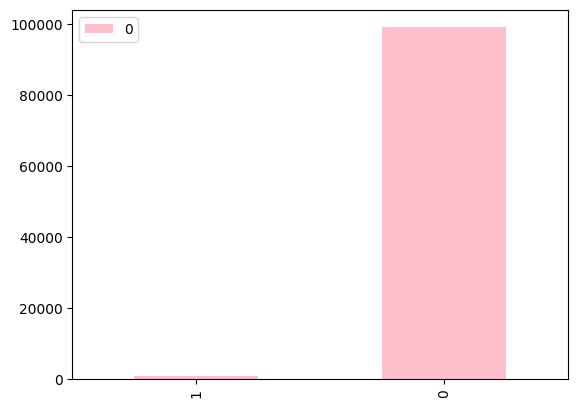

In [3]:
state_counts = Counter(df['is_fraud'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar', color='pink')

num=(df_state[0]/df_state[0].sum())**2

print("Would Recommend:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

In [4]:
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']
(X_train, X_test, y_train, y_test) = train_test_split(X, 
                                                      y, 
                                                      random_state=1337, 
                                                      test_size=0.25) 

💡 **Random Forest** and **Gradient Boosting Method** are ensemble decision tree models that aims to improve decision trees **generalization capability** however it suffers from difficulty of **interpreting** the important features of a standard decision tree model.

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Decision Tree </span></div>

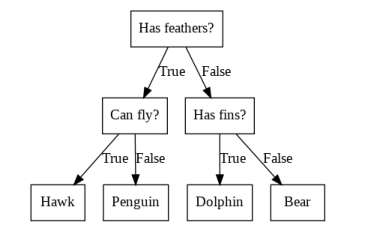

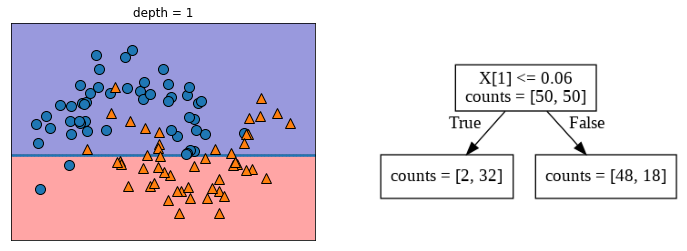

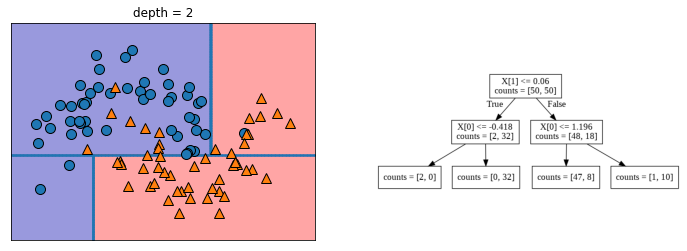

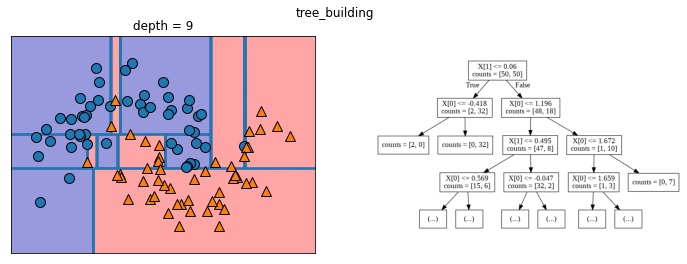

In [5]:
dt = DecisionTreeClassifier(random_state=1337)

dt.fit(X_train, y_train)

print("accuracy on training set: %f" % dt.score(X_train, y_train))
print("accuracy on test set: %f" % dt.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.997560


As expected, the accuracy on the training set is 100% as the leaves are <b>pure</b>. 

Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One possible way is to stop building the tree after a certain depth has been reached. Here we set max_depth=4, meaning only four consecutive questions can be asked

In [6]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

print("accuracy on training set: %f" % dt.score(X_train, y_train))
print("accuracy on test set: %f" % dt.score(X_test, y_test))

accuracy on training set: 0.997013
accuracy on test set: 0.996920


In [7]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in tqdm(range(1,10,1)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    maxdepth_settings = range(1, 11) # try maxdepth from 1 to 10

    for depth in tqdm(maxdepth_settings):   
        tree = DecisionTreeClassifier(max_depth=depth)  # build the model
        tree.fit(X_train, y_train)

        training_accuracy.append(tree.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(tree.score(X_test, y_test))   # record generalization accuracy
    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Highest Average Test Set Achieved = 0.997173
Best max_depth Parameters = 10


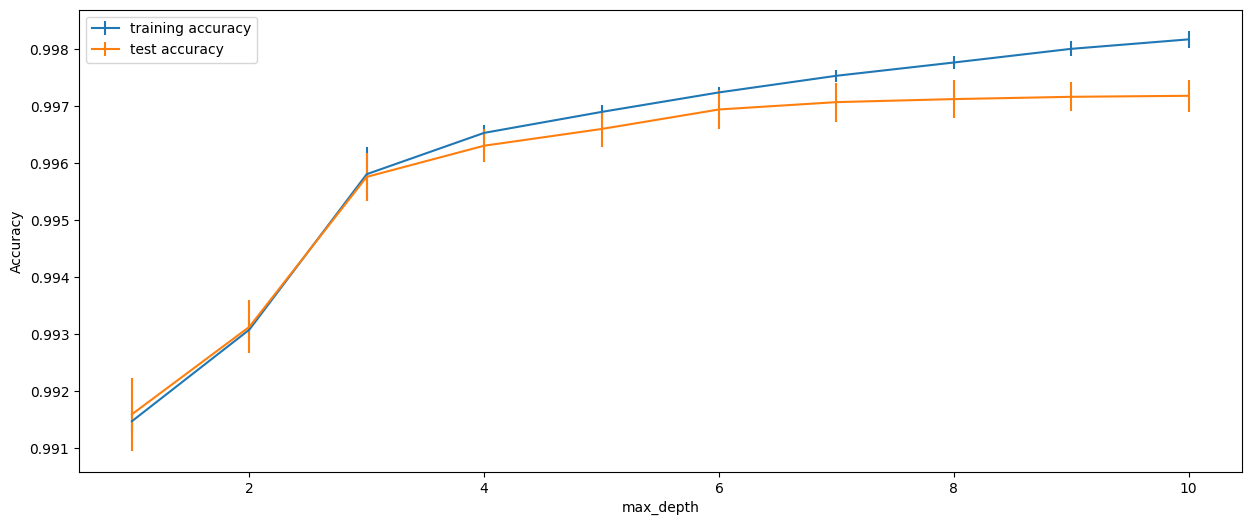

In [8]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(maxdepth_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy")
plt.errorbar(maxdepth_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
bestdepth=np.argmax(all_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(all_test.mean(axis=1)))
print("Best max_depth Parameters = %d" %bestdepth )

In [18]:
import pickle as pkl

In [19]:
# save the model to a pickle file
pickle_file_name = "tree.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(tree, file)

In [23]:
obj = pd.read_pickle(r'tree.pkl')
obj

DecisionTreeClassifier(max_depth=10)

In [24]:
obj = pd.read_pickle(r'rf_depth_feat.pkl')
obj

RandomForestClassifier(max_depth=10, max_features=140, random_state=42)

Too small values of the depth of the tree will result to <u>underfitting</u> but limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

### Analyzing the tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=9, random_state=10)
dt.fit(X_train, y_train)

print("accuracy on training set: %f" % dt.score(X_train, y_train))
print("accuracy on test set: %f" % dt.score(X_test, y_test))

from sklearn.tree import export_graphviz

export_graphviz(dt, out_file="mydt.dot", class_names=["malignant", "benign"],
feature_names=X.columns, impurity=False, filled=True)

# import graphviz
# with open("mydt.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

In [25]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.54541603, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# def plot_feature_importances(model, df):
#     n_features=df.shape[1]
#     plt.barh(range(1, n_features), model.feature_importances_, align='center')
#     plt.yticks(np.arange(n_features), df.columns)
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
#     plt.ylim(-1,n_features)
    
# plot_feature_importances(dt, df)

<u>Advantages</u>:

(1) Can be easily be visualized and understood by non-experts (at least for smaller trees) <br>
(2) Invariant to scaling of the data. Decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous features.

<u>Disadvantages</u>:

(1) Decision trees tend to overfit <br>
(2) Provide poor generalization performance

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Random Forest </span></div>

<b>Random forest</b> get their name from injecting randomness into the tree building to ensure each tree is different. There are two ways in which the trees in a random forest are randomized: by selecting the data points used to build a tree and by selecting the features in each split test

<i>n_estimator</i>- number of trees to build <br>
<i>max_features</i>- amount of features that is randomly selected

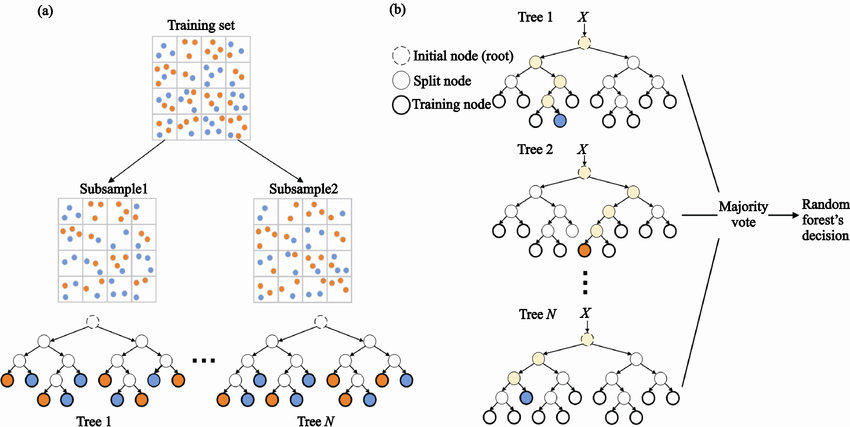

In [ ]:
forest = RandomForestClassifier(n_estimators=5, random_state=1337)
forest.fit(X_train, y_train)

In [ ]:
rf = RandomForestClassifier(random_state=1337)

rf.fit(X_train, y_train)

print("accuracy on training set: %f" % rf.score(X_train, y_train))
print("accuracy on test set: %f" % rf.score(X_test, y_test))

<u>Advantages</u>:

(1) Work well without heavy tuning of the parameters <br>
(2) Invariant to scaling of the data

<u>Disadvantages</u>:

(1) Might be longer to run than the decision tree <br>

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Gradient Boosting </span></div>

<b>Gradient boosting</b> works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one

<i>learning_rate</i>- how strongly each tree tries to correct the mistakes of the previous trees <br>

In [10]:
import time 
start = time.time()
gbm = GradientBoostingClassifier(random_state=1337)
gbm.fit(X_train, y_train)
print("Runtime (in secs): ", time.time() - start)
print("accuracy on training set: %f" % gbm.score(X_train, y_train))
print("accuracy on test set: %f" % gbm.score(X_test, y_test))

Runtime (in secs):  370.05105662345886
accuracy on training set: 0.998760
accuracy on test set: 0.997520


In [11]:
import time 
start = time.time()
gbm = GradientBoostingClassifier(learning_rate = 0.2, random_state=1337)
gbm.fit(X_train, y_train)
print("Runtime (in secs): ", time.time() - start)
print("accuracy on training set: %f" % gbm.score(X_train, y_train))
print("accuracy on test set: %f" % gbm.score(X_test, y_test))

Runtime (in secs):  364.0401153564453
accuracy on training set: 0.993453
accuracy on test set: 0.993320


In [16]:
import time 
start = time.time()
gbm = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.3, random_state=1337)
gbm.fit(X_train, y_train)
print("Runtime (in secs): ", time.time() - start)
print("accuracy on training set: %f" % gbm.score(X_train, y_train))
print("accuracy on test set: %f" % gbm.score(X_test, y_test))

Runtime (in secs):  903.4363126754761
accuracy on training set: 0.993747
accuracy on test set: 0.993440


In [17]:
import time 
start = time.time()
gbm = GradientBoostingClassifier(max_depth = 5, n_estimators = 100, learning_rate = 0.3, random_state=1337)
gbm.fit(X_train, y_train)
print("Runtime (in secs): ", time.time() - start)
print("accuracy on training set: %f" % gbm.score(X_train, y_train))
print("accuracy on test set: %f" % gbm.score(X_test, y_test))

Runtime (in secs):  929.984041929245
accuracy on training set: 0.996187
accuracy on test set: 0.995160


In [ ]:
#import time 
#start = time.time()
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in tqdm(range(1,10,1)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    maxdepth_settings = range(1, 11) # try maxdepth from 1 to 10

    for depth in tqdm(maxdepth_settings):   
        tree = GradientBoostingClassifier(max_depth=depth)  # build the model
        tree.fit(X_train, y_train)

        training_accuracy.append(tree.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(tree.score(X_test, y_test))   # record generalization accuracy
    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(maxdepth_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy")
plt.errorbar(maxdepth_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
bestdepth=np.argmax(all_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(all_test.mean(axis=1)))
print("Best max_depth Parameters = %d" %bestdepth )

In [ ]:
# save the model to a pickle file
pickle_file_name = "tree.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(tree, file)

In [23]:
import numpy as np

In [26]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in tqdm(range(1,10,1)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    learningrate_settings = np.arange(0.1, 0.3, 0.05) # try learning_rate from 0.1 to 0.3

    for depth in tqdm(learningrate_settings):   
        tree = GradientBoostingClassifier(learning_rate=depth)  # build the model
        tree.fit(X_train, y_train)

        training_accuracy.append(tree.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(tree.score(X_test, y_test))   # record generalization accuracy
    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in tqdm(range(1,10,1)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    learningrate_settings = np.arange(0.1, 0.3, 0.01) # try learning_rate from 0.1 to 0.3

    for depth in tqdm(learningrate_settings):   
        tree = GradientBoostingClassifier(learning_rate=depth)  # build the model
        tree.fit(X_train, y_train)

        training_accuracy.append(tree.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(tree.score(X_test, y_test))   # record generalization accuracy
    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Highest Average Test Set Achieved = 0.960526
Best max_depth Parameters = 1


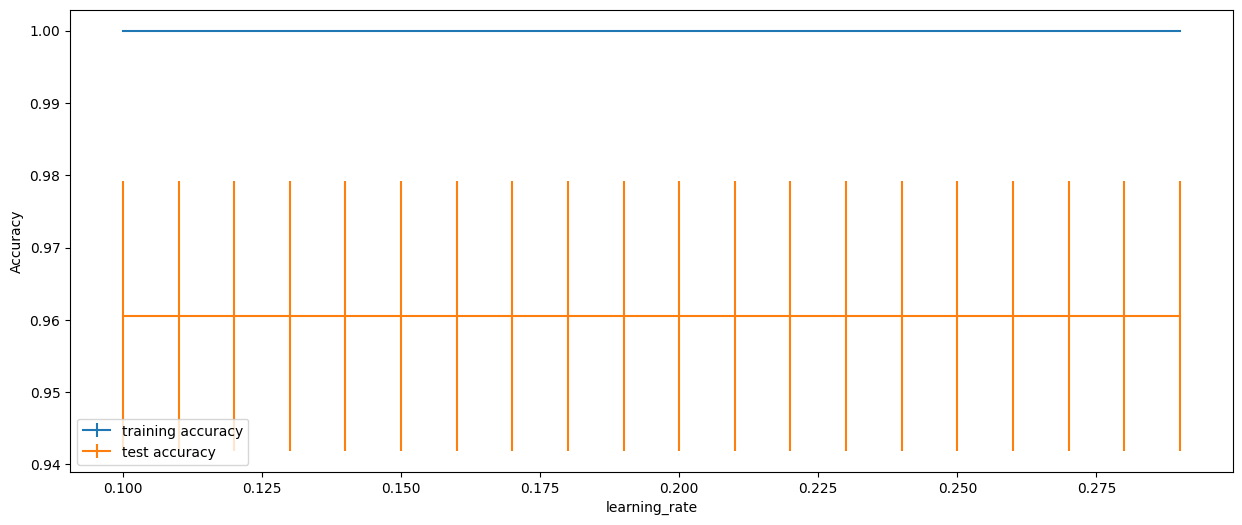

In [30]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(learningrate_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy")
plt.errorbar(learningrate_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("learning_rate")
plt.legend()
bestdepth=np.argmax(all_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(all_test.mean(axis=1)))
print("Best max_depth Parameters = %d" %bestdepth )

Highest Average Test Set Achieved = 0.941520
Best max_depth Parameters = 3


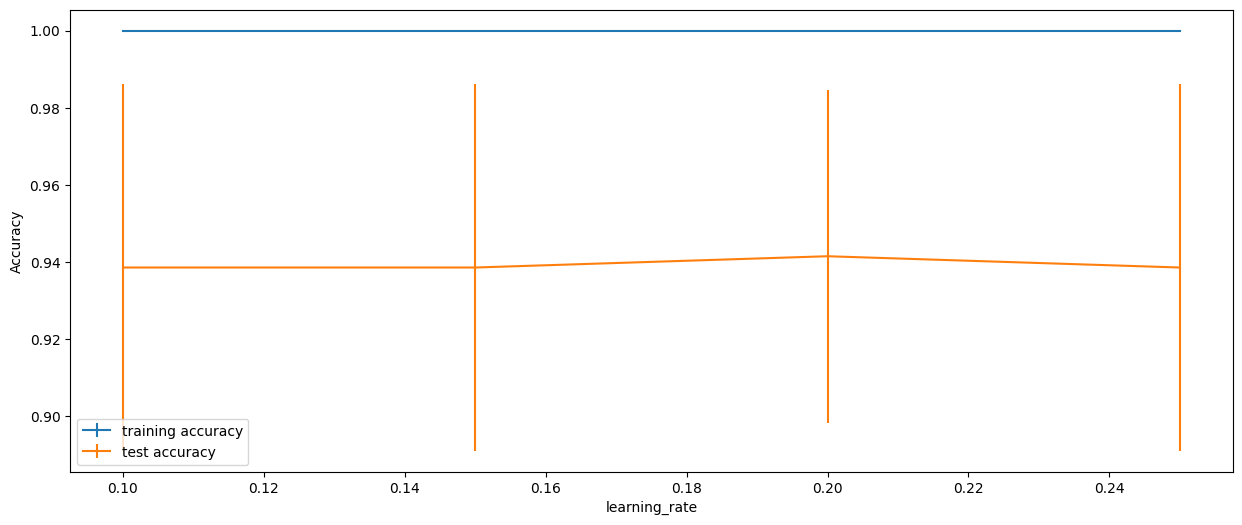

In [27]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(learningrate_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy")
plt.errorbar(learningrate_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("learning_rate")
plt.legend()
bestdepth=np.argmax(all_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(all_test.mean(axis=1)))
print("Best max_depth Parameters = %d" %bestdepth )

In [31]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in tqdm(range(1,10,1)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    learningrate_settings = np.arange(0.1, 0.3, 0.01) # try learning_rate from 0.1 to 0.3

    for rate in tqdm(learningrate_settings):   
        tree = GradientBoostingClassifier(learning_rate=rate)  # build the model
        tree.fit(X_train, y_train)

        training_accuracy.append(tree.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(tree.score(X_test, y_test))   # record generalization accuracy
    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [18]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in tqdm(range(1,10,1)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    maxdepth_settings = range(1, 11) # try maxdepth from 1 to 10

    for depth in tqdm(maxdepth_settings):   
        tree = GradientBoostingClassifier(max_depth=depth)  # build the model
        tree.fit(X_train, y_train)

        training_accuracy.append(tree.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(tree.score(X_test, y_test))   # record generalization accuracy
    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

<u>Advantages</u>:

(1) Invariant to scaling of the data

<u>Disadvantages</u>:

(1) Might be longer to run than the decision tree <br>
(2) Sensitive to parameter choice <br>

(3) Does not work well on sparse data

In [13]:
from sklearn import svm
from sklearn import datasets

In [14]:
clf = svm.SVC()
X, y= datasets.load_iris(return_X_y=True)
clf.fit(X, y)
SVC()

import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])
array([0])
y[0]

NameError: name 'SVC' is not defined

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Exercise </span></div>

1. Further hypertune the Random Forest and Gradient Boosting models on at least one parameter.
2. Implement at least one boosting techniques.

<div><span style="background-color: pink; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: black; font-size: 18px; font-weight: bold">Supplementary</span></div>

## Other Techniques

The following presents other Boosting models that can further increase model performance. *Note: Description column is delibrately left out for your exercise.*

|Name|Description|
|--|--|
|[AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)|xxx|
|[ExtraTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)|xxx|
|[XGBoost](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html)|xxx|
|[CatBoost](https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier)|xxx|
|[LGBM](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)|xxx|